In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [ ]:
tf.__version__
tf.enable_eager_execution()

In [ ]:
cancer = datasets.load_breast_cancer()

# 독립변수
X = cancer.data
X = np.array(X, dtype='float32')

# 종속변수 type: int64 -> float32 변환
y = cancer.target
y = np.array(y, dtype='float32')

In [ ]:
# 독립변수 X 로 y 예측할려면  두개의 차원이 같아야함
# X,y의 행렬이 맞게 하여 cost연산 가능하게 함
print("X.shape :", X.shape)
print("y.shape :",y.shape)

# reshape(줄, 칸) 
# -1 : 자동 전체 선택
y = y.reshape(-1, 1)

print("y.shape 변환 후 ",y.shape)

X.shape : (569, 30)
y.shape : (569,)
y.shape 변환 후  (569, 1)


In [ ]:
y.shape # = (569,)
y.reshape(1,569) # 1줄 569칸으로 변환 = (1,-1)
y.reshape(569,1) # 569줄 1칸으로 변환 = (-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y)

# Scaler
:모든 칸의 자릿수, 값의 범위 맞추는 객체 

x1 = 3자릿수 -> -200~200

x2 = 4자릿수 -> 0~4000

딥러닝 모든 칸의 자릿수, 값의 범위가 같아야 정확한 예측 가능


In [ ]:
df = pd.DataFrame({
                "x1" : [-200, -100, 0, 100, 200], 
                "x2" : [0, 1000, 2000, 3000, 4000] 
              })

df

,x1,x2
0,-200,0
1,-100,1000
2,0,2000
3,100,3000
4,200,4000


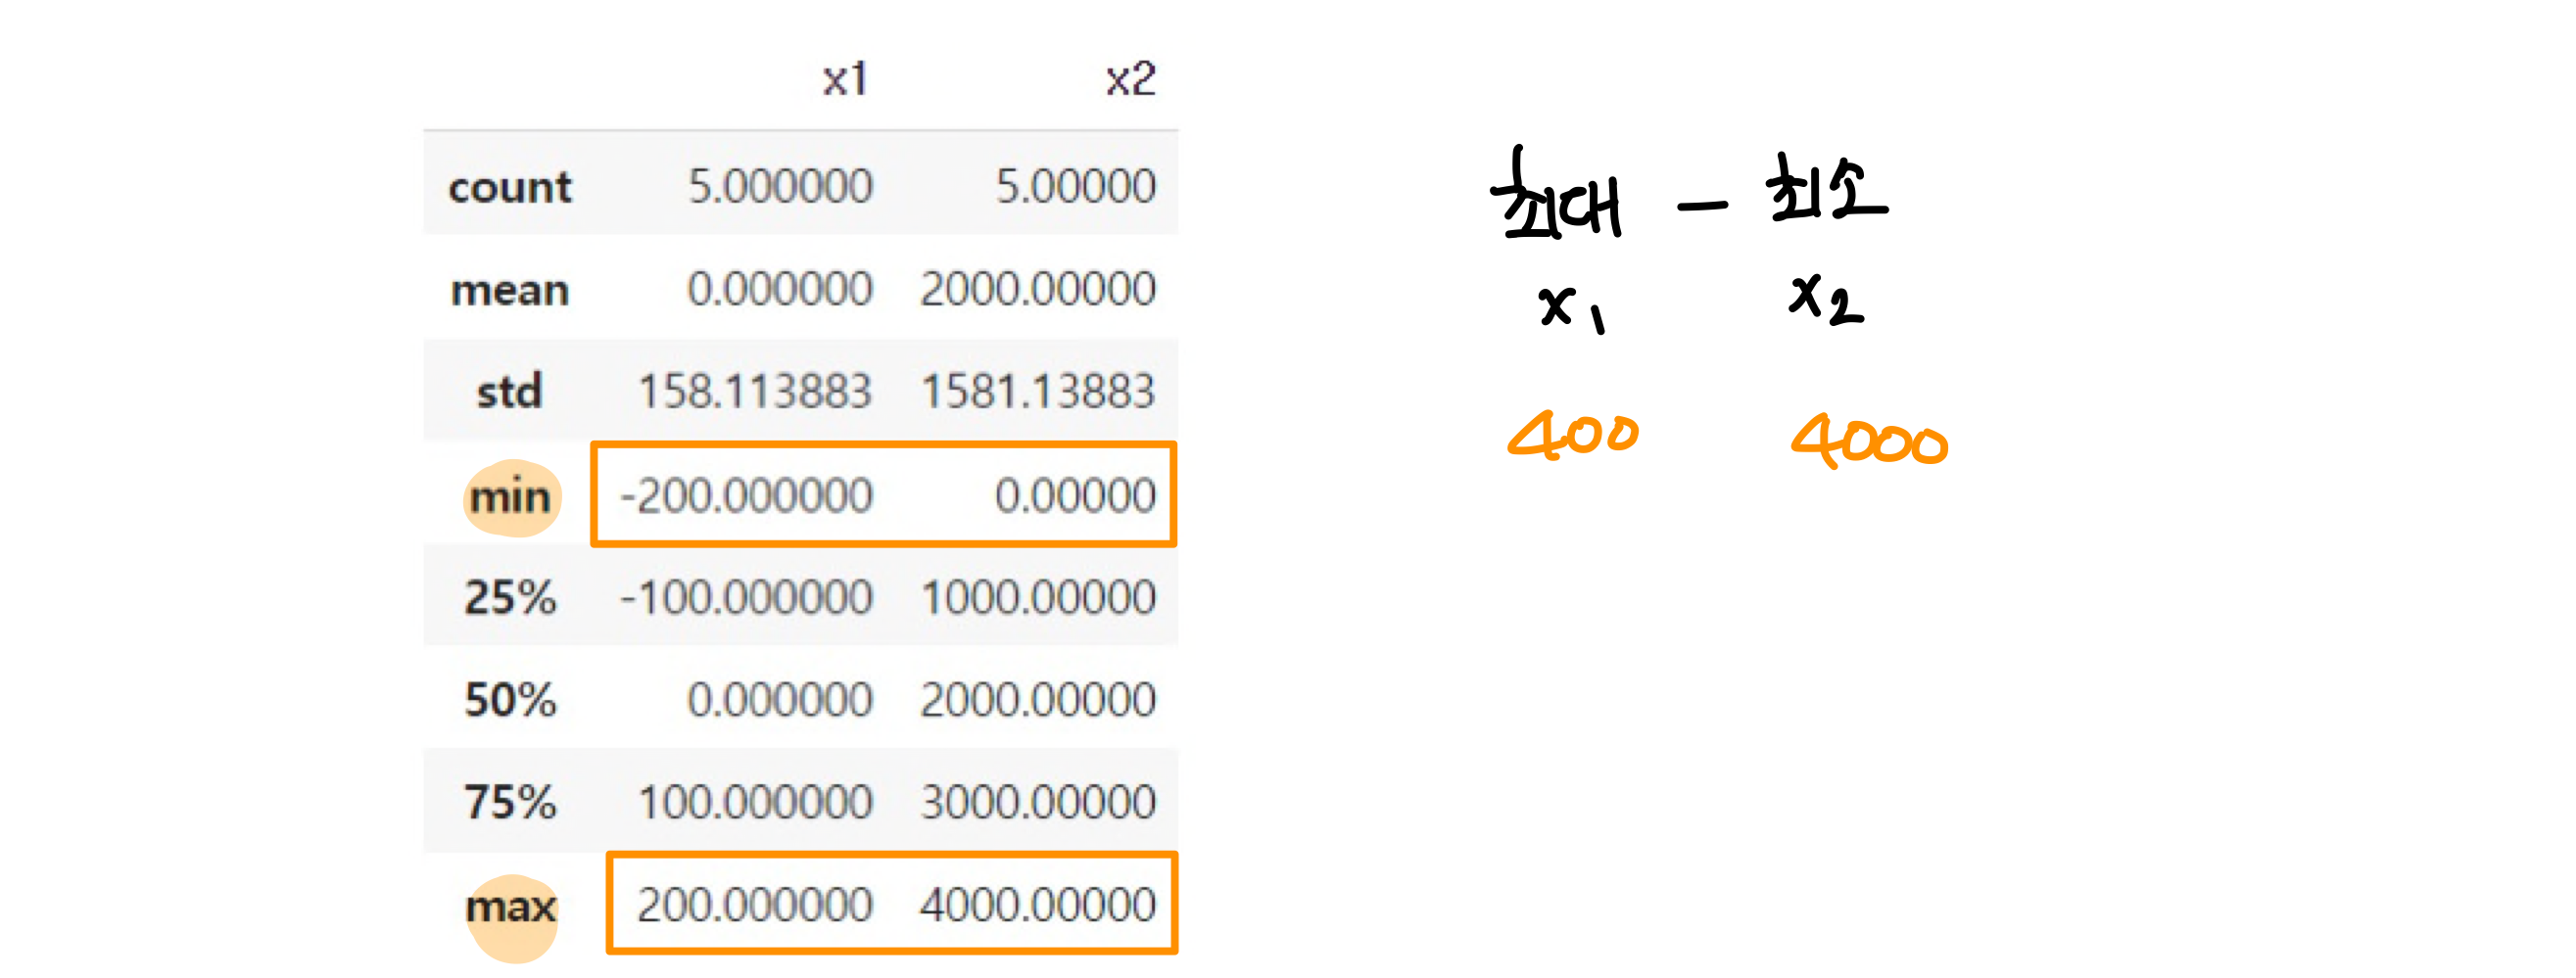

## Min Max Scaler
: 최소값(Min)과 최대값(Max)을 사용해서 '0~1' 사이의 범위로 데이터 값을 표준화

(데이터 - 각 칸의 최솟값)/
(각 칸의 최댓값 - 최솟값)

In [ ]:
# 요약 정보보기?
# 최댓값, 최솟값 확인
df.describe()

,x1,x2
count,5.000000,5.00000
mean,0.000000,2000.00000
std,158.113883,1581.13883
min,-200.000000,0.00000
25%,-100.000000,1000.00000
50%,0.000000,2000.00000
75%,100.000000,3000.00000
max,200.000000,4000.00000


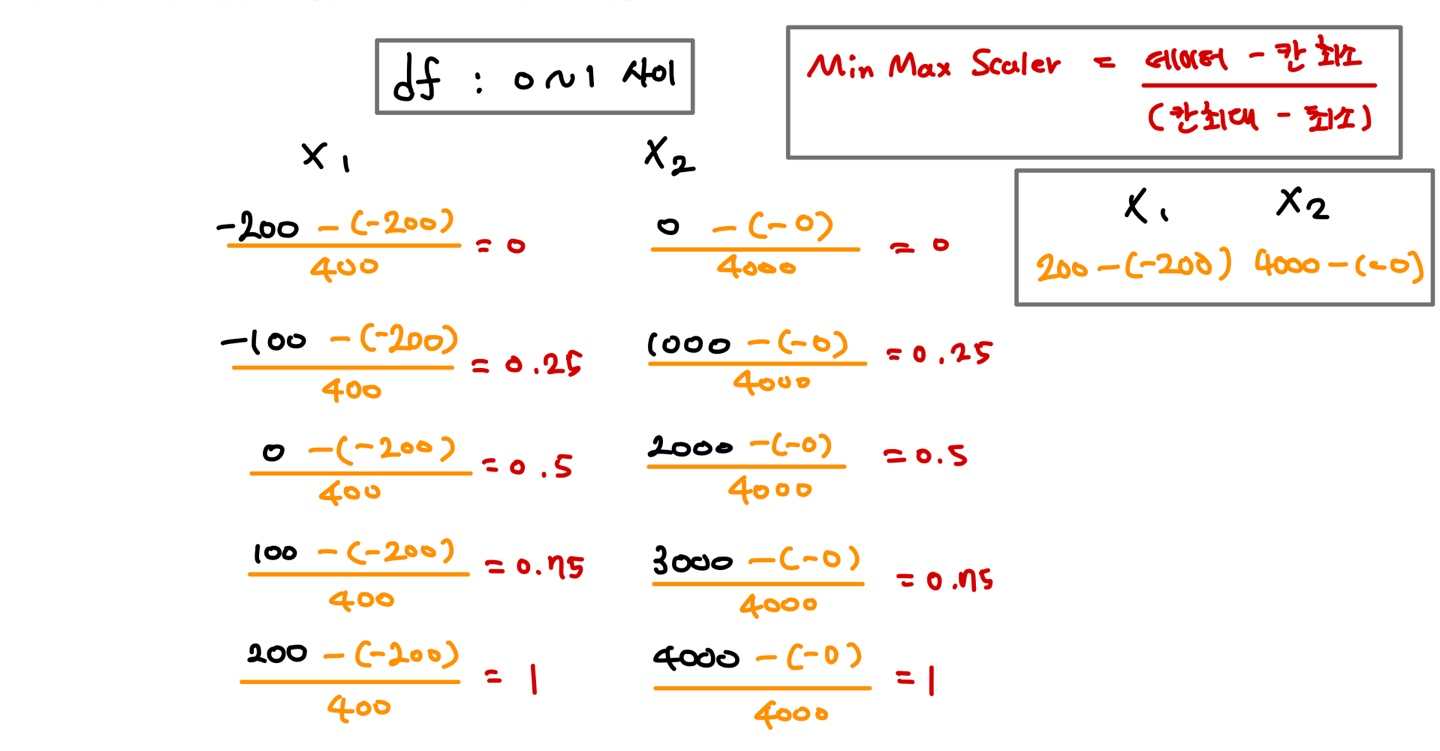

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 각 칸 최소, 최대 계산
scaler = MinMaxScaler()

# min-max값 학습
scaler.fit(df)

# 전환
scaler.transform(df)

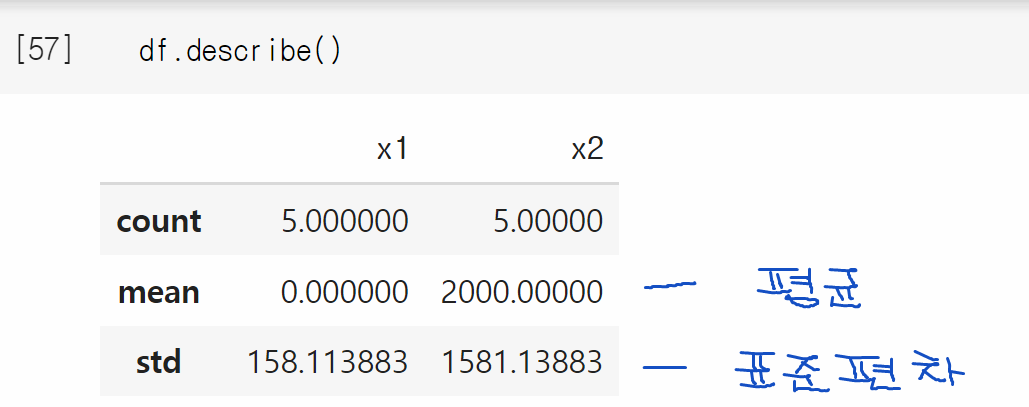

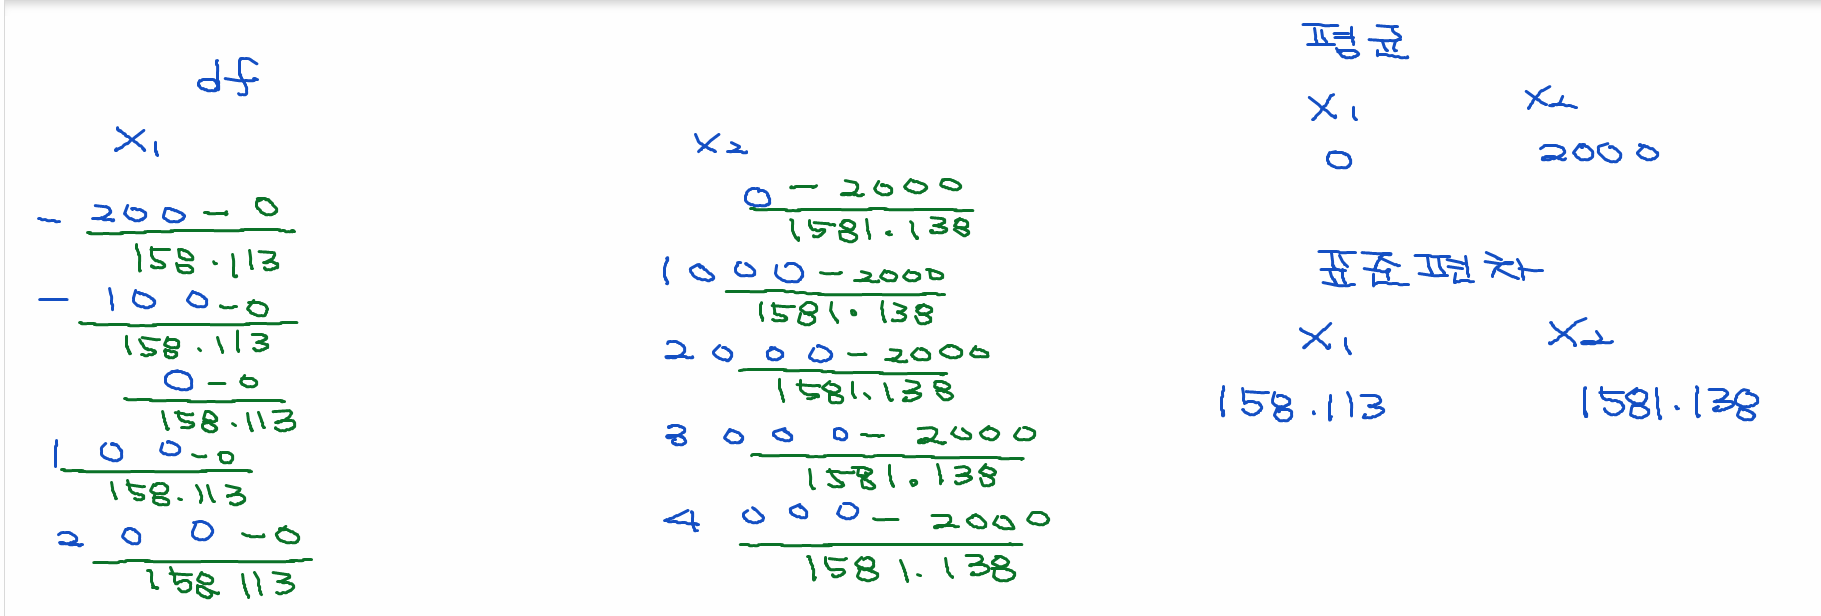

## standard Scaler
(데이터 - 칸의 평균)/칸의 표준편차(std)

평균 0 , 분산 1로 조정

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 평균 0 , 분산 1로 조정
scaler = StandardScaler()

# 각 칸 계산
scaler.fit(df)

# 전환
scaler.transform(df)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[-0.8037724 , -0.24494298, -0.7418245 , ...,  0.12737897,
         0.6659932 ,  2.473282  ],
       [ 1.7570546 ,  0.05722311,  1.7622327 , ...,  1.5923712 ,
         0.21258333, -0.16884874],
       [-0.23277734,  0.2228548 , -0.18178912, ...,  0.5477015 ,
         1.3740358 ,  1.0159268 ],
       ...,
       [ 1.7512867 ,  0.08408207,  1.6493055 , ...,  0.4449218 ,
         0.2503674 , -1.3250171 ],
       [-0.67111695, -0.25613457, -0.6970719 , ..., -0.64270073,
        -1.5189177 , -0.7949718 ],
       [ 2.1002285 , -0.9365674 ,  2.0759194 , ...,  1.2748286 ,
        -0.28353938,  0.15014976]], dtype=float32)

In [ ]:
X_train = scaler.transform(X_train)
X_train[0:1]

array([[-0.8037724 , -0.24494298, -0.7418245 , -0.7550773 , -0.04160915,
         0.569765  ,  0.8641672 , -0.5127018 ,  0.9198449 ,  2.044792  ,
        -0.5862448 ,  0.7901428 , -0.23183334, -0.5494665 , -0.12772757,
         1.8905487 ,  1.7977564 ,  0.23947021, -0.06909265,  1.9072596 ,
        -0.7692477 ,  0.34722438, -0.59876317, -0.7257518 ,  0.0860655 ,
         1.4650414 ,  2.2760887 ,  0.12737897,  0.6659932 ,  2.473282  ]],
      dtype=float32)

##예측값 계산

H(x) = sigmoid(X_train * w + b)

w,b의 맨 처음 값 어떤 값으로 줘야 cost(mse)가 0 으로 되는 w,b를 빨리 정확히 찾을까?

1. xavier 계산법
2. he 계산법

= w,b의 처음값 대입 cost가 0이 되는 w,b 빨리 찾고 정확

In [ ]:
# 예측값 계산 
# w,b 의 맨처음 값을 어떤 값으로 줘야 cost가 0이되는 w,b를 빨리 찾을까?
# 방법 1 : Xavier
# 방법 2 : her


# 방법 1
initializer = tf.contrib.layers.xavier_initializer()

# [줄, 칸]  30줄 1칸
w = tf.Variable(initializer([30 , 1 ]))

b = tf.Variable(initializer([1]))

In [ ]:
w

In [ ]:
b

### 방법1 : xavier

In [ ]:
# xavier 계산법 계산할 객체
initializer = tf.contrib.layers.xavier_initializer()

# initializer([줄, 칸]) = ([30,1]) : xavier 계산법으로 계산해서 30줄 1칸의 w를 리턴
initializer([30 , 1 ])
w = tf.Variable( initializer([30 , 1 ]) )
w

b = tf.Variable( initializer([1]) )
b

<function tensorflow.contrib.layers.python.layers.initializers.variance_scaling_initializer.<locals>._initializer>

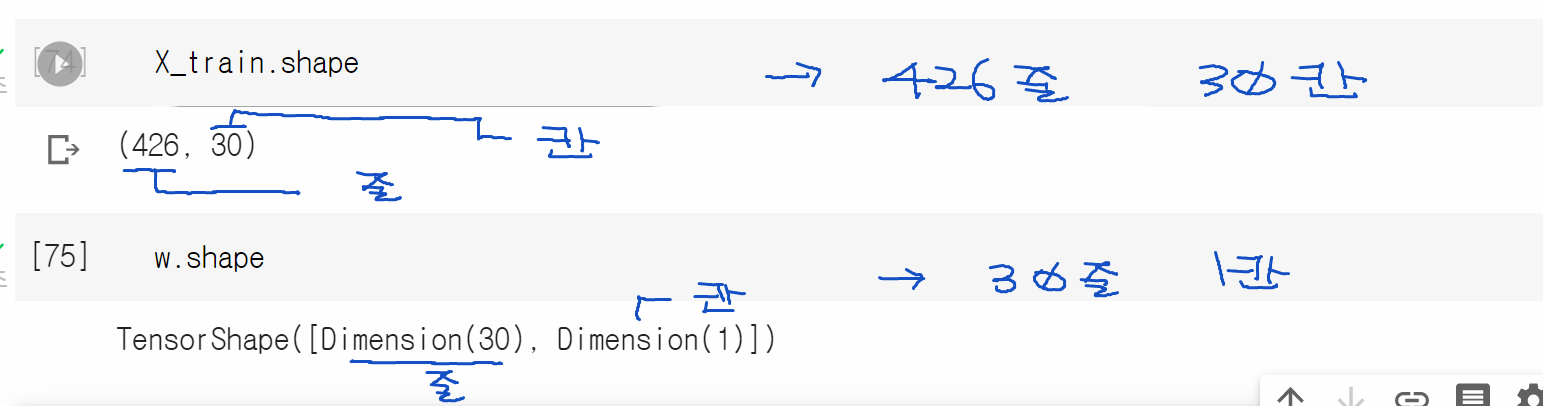

In [ ]:
X_train

array([[-0.8037724 , -0.24494298, -0.7418245 , ...,  0.12737897,
         0.6659932 ,  2.473282  ],
       [ 1.7570546 ,  0.05722311,  1.7622327 , ...,  1.5923712 ,
         0.21258333, -0.16884874],
       [-0.23277734,  0.2228548 , -0.18178912, ...,  0.5477015 ,
         1.3740358 ,  1.0159268 ],
       ...,
       [ 1.7512867 ,  0.08408207,  1.6493055 , ...,  0.4449218 ,
         0.2503674 , -1.3250171 ],
       [-0.67111695, -0.25613457, -0.6970719 , ..., -0.64270073,
        -1.5189177 , -0.7949718 ],
       [ 2.1002285 , -0.9365674 ,  2.0759194 , ...,  1.2748286 ,
        -0.28353938,  0.15014976]], dtype=float32)

In [ ]:
X_train.shape

(426, 30)

In [ ]:
w.shape

TensorShape([Dimension(30), Dimension(1)])

## 예측값

In [ ]:
# 행렬곱해서 선형회귀 계산
tf.matmul(X_train , w) + b

In [ ]:
def sigmoid(h):
  return 1/(1 + np.exp(-h))

In [ ]:
hypothesis = sigmoid(tf.matmul(X_train , w) + b)
hypothesis

In [ ]:
# w,b 자동으로 수정하는 optimizer 객체 생성
optimizer = tf.train.AdamOptimizer(0.000001)

# 반복해서 w,b찾음
for step in range(50000):
  print("="*100)
  print("step = ", step)
  with tf.GradientTape() as tape:
    # 로지스틱 회귀 식을 변수 hypothesis에 대입
    # matmul : 배열끼리 곱
    hypothesis = tf.sigmoid(tf.matmul(X_train, w) + b)
    #print("hypothesis(예측) : ", hypothesis)

    # 로지스틱 회귀식의 오차 계산
    # cost에 대입하면 텐서플로우에서 자동으로 오차를 가장 적게하는 w,b 찾아줌
    # tf.log(hypothesis) : hypothesis의 로그값을 계산
    # tf.reduce_mean() : 평균을 계산
    cost = -tf.reduce_mean(y_train * tf.log(hypothesis)+(1 - y_train)* tf.log(1 - hypothesis))
    print("cost (MSE) : " , cost)

    grads = tape.gradient(cost, [w,b])
    #print("grads (w, b 기울기) : ", grads)

  # 업데이트
  optimizer.apply_gradients(grads_and_vars=zip(grads,[w,b]))
  #print("update된 w :", w)
  #print("update된 b :", b)

In [ ]:
# Gradient Decent 이용해 계산이 완료된 w,b
print("update된 w :", w)
print("update된 b :", b)

In [ ]:
X_test = scaler.transform(X_test)

predict = tf.sigmoid(tf.matmul(X_test,w) + b)

# tf.cast(조건) 조건에 만족 1 아니면 0
predict01 = tf.cast(predict > 0.5, dtype = tf.float32)
print(predict01)

# tf.equal(predict01, y_test): 조건을 만족하면 True 아니면 False
ac01 = tf.equal(predict01, y_test)
print(ac01)


ac02 = tf.cast(ac01, dtype ='float32')

# 변환한 0과 1의 합을 구한 후 데이터의 개수로 나눔
ac03 = tf.reduce_mean(ac02)

## 정확도

In [ ]:
# 정확도
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict01, y_test), dtype = tf.float32))

print(accuracy)

# 텐서플로우 2.x

In [ ]:
%tensorflow_version 2.x

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [ ]:
# 데이터 로드
cancer = datasets.load_breast_cancer()

# 독립
X = cancer.data
X = np.array(X, dtype='float32')
# 종속
y = cancer.target
y = np.array(y, dtype='float32')

# 스플릿
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

# X 에서 평균을 빼고 표준편차로 나눠서 평균 -> 0 / 표준편차 -> 1로 변환할 객체
scaler = StandardScaler()

# X_train의 평균,표준편차 계산
scaler.fit(X_train)

# X_train에서 평균을 빼고 표준편차로 나눠서 X_train에 대입
X_train = scaler.transform(X_train)

In [ ]:
# 예측할 Seuqential(순차) 객체 생성
model = Sequential()

# 모델을 예측 할 수 있도록 model에 추가
# input_dim = 30 --> 입력데이터 X , 칸의 수는 30
# Dense(1)  = 출력데이터는 y, 칸이 수는 1
model.add(Dense(1,input_dim = 30, activation="sigmoid"))

model.summary()

In [ ]:
# 경사하강법 설정
# loss = 'binary_crossentropy : 합이 최소가 되는 w,b 찾음
# learning rate 0.001 설정
# 정확도 출력
model.compile(loss = 'binary_crossentropy', optimizer= Adam(lr = 0.001), metrics=['acc'])

#학습
model.fit(X_train, y_train, epochs= 1000)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# scaler 를 이용해서 X_test의 범위 변경
# scaler.fit(X_train) 함수로 인해 sacler 평균, 표준편차 저장되어있음

# transform(X_test) : X_test에서 X_train의 평균을 빼고 X_train의 표준편차로 나눠줌
X_test = scaler.transform(X_test)
X_test

array([[ -3.9665253 ,  -4.9463363 ,  -3.7587152 , ...,   0.4162677 ,
         -4.8859315 , -15.40248   ],
       [ -4.0098033 ,  -4.613112  ,  -3.7634943 , ...,   3.9220002 ,
          0.25334847, -17.02855   ],
       [ -3.4872649 ,  -4.374553  ,  -3.694624  , ...,   5.548844  ,
        -23.576805  , -44.572483  ],
       ...,
       [ -4.146849  ,  -4.564967  ,  -3.7855623 , ...,  -8.746756  ,
          1.5453453 , -11.221099  ],
       [ -4.205354  ,  -4.7277927 ,  -3.7929409 , ...,  -5.545771  ,
        -11.345906  , -21.940012  ],
       [ -3.9216447 ,  -4.462728  ,  -3.7486205 , ...,  20.900747  ,
         -6.4650345 ,  -7.836187  ]], dtype=float32)

In [ ]:
# 예측
pred = model.predict(X_test)
pred

# 예측값이 0.5 이상이면 1, 아니면 0
predict01 = np.where(pred > 0.5 , 1, 0)
print(predict01)

# predict01을 1차원 배열로 변환
predict02 = predict01.flatten()
predict02

# predict02 == y_test 같으면 true 다르면 false 리턴
predict03 = (predict02 == y_test)
predict03

In [ ]:
# true => 1 / false => 0 계산 합
np.sum(predict03)

# predict03 줄의 수 리턴
len(predict03)

# 정확도 계산
acc = np.sum(predict03)/len(predict03)
acc

0.5175438596491229